## Project name and type
# Retail Sales Prediciton using Regression

##Collaboration - Individual
##name - Siddique Aslam

Github Link-https://github.com/siddique5936/retail_sales_project

#summary
Retail sales prediction is the process of forecasting future sales in the retail industry based on historical data, market trends, and various predictive models. This activity is essential for retailers to make informed decisions regarding inventory management, marketing strategies, and overall business planning.  

The goal is to forecast or estimate the sales of a product or service based on various factors. Here's a brief summary:

1. Objective: The main aim is to understand and quantify the relationship between the dependent variable (sales) and independent variables (factors influencing sales).

2. Data Collection: Gather relevant data, which may include historical sales figures, marketing expenditures, economic indicators, and other factors that could impact sales.

3. Variables:  
Dependent Variable (DV): Sales. This is what we're trying to predict.  
Independent Variables (IV): These are the factors that can influence sales, such as marketing expenses, seasonality, economic conditions, promotions, etc.
4. Regression Model: Use a regression analysis technique (linear regression, multiple regression, etc.) to create a mathematical model that represents the relationship between the dependent and independent variables.

5. Training the Model: The model is trained using historical data, where it learns the patterns and relationships between the variables.

6. Evaluation: Assess the performance of the model using metrics like Mean Squared Error (MSE), R-squared, or others to measure how well the model predicts actual sales.

7. Prediction: Once the model is trained and evaluated, it can be used to make predictions on future sales based on new input data.

8. Iteration: Models may need to be refined or adjusted based on ongoing performance evaluation and changes in the business environment.

Benefits:

Helps in better decision-making by providing insights into what factors drive sales.
Enables proactive planning based on anticipated sales trends.
Optimizes resource allocation, such as marketing budget and inventory management.


#project description
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.  
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

#data description
Rossmann Stores Data.csv - historical data including Sales  
store.csv - supplemental information about the stores  
Data fields:  
Most of the fields are self-explanatory. The following are descriptions for those that aren't.  
Id - an Id that represents a (Store, Date) duple within the test set  
Store - a unique Id for each store  
Sales - the turnover for any given day (this is what you are predictin)  
Customers - the number of customers on a given day  
Open - an indicator for whether the store was open: 0 = closed, 1 = open  
StateHoliday - indicates a state holiday. Normally all stores, with few   exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None  
SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools  
StoreType - differentiates between 4 different store models: a, b, c, d  
Assortment - describes an assortment level: a = basic, b = extra, c = extended
CompetitionDistance - distance in meters to the nearest competitor store  
CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened  
Promo - indicates whether a store is running a promo on that day   
Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2  
PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
#importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
# mounting from the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the data
rossman_df=pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')
rossman_df.head()

<ipython-input-3-342584fb2085>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman_df=pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


we can see here all the variables here,where here sales is a dependent variable and remaining all other are independent variable

so we can see here the visualization between dependent and independent variable

In [4]:
# columns of the data
rossman_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [5]:
# shape of the data
rossman_df.shape

(1017209, 9)

we can see here there are 1017209 are rows and 9 column

In [6]:
# describtion of data only numerical variable
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


By comparing and observing the inter quantile range we can see here no outliers present in the rossman dataset

In [7]:
# describtion of the all categorical and numerical data
rossman_df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [8]:
# observing the duplicate values in the dataset
rossman_df.duplicated().any()

False

there's no duplicate values here

In [9]:
# information about the data
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


We can see no null values here and we can see the data types of the variable.like, it caontains 7 numerical variable and 2 cathegorical variables

In [10]:
# finding is their any missing values
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

great there is no null values here

In [11]:
# counting unique value of each and every vaiables
for var in rossman_df.columns:
  unique_values=rossman_df[var].value_counts()
  print(unique_values)

1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: Store, Length: 1115, dtype: int64
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64
2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64
0       172869
560       2414
576       2363
603       2337
571       2330
         ...  
4815         1
3998         1
4210         1
4920         1
4065         1
Name: Customers, Length: 4086, dtype: int64
1    844392
0    172817
Name: Open, dtype: int64
0  

we can see here the unique values of each and every variable of the rossman data  

1. store variable value count shows the store number how many times it repeated  

2. dayofweek variable shows the repeated week day which the store is open and given profits to a store here we can see that the weekday 4 and 5 has most numbers of stores  

3. date variable shows the how many times the the same date is repeated so we can see here that the date 2015-07-31 has repeated most of the times

4. sales column has most number of 0 sales where store didnot get any profit  

5. in open variable number of store were open was about 844392 and 172817 store were closed  

6. there are 4 types of stateholiday 0,a,b,c in which 0 has repeated 986159 times,a repeated 20260,b repeated 6690,c repeated 4100.

7. in schoolholiday variable they are two types 0 and 1 where 0 occur 835488 and 1 occur 181721

here we see that 0 in stateholiday are two times so we make it to show only 1 times  


In [7]:
# updating state holiday variable
rossman_df['StateHoliday']=rossman_df['StateHoliday'].apply(lambda x:0 if x=='0' else x)
rossman_df['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

we added both zeros and it given the result 986159

# Exploratory data analysis

##plot the variables

<Axes: xlabel='StateHoliday', ylabel='Customers'>

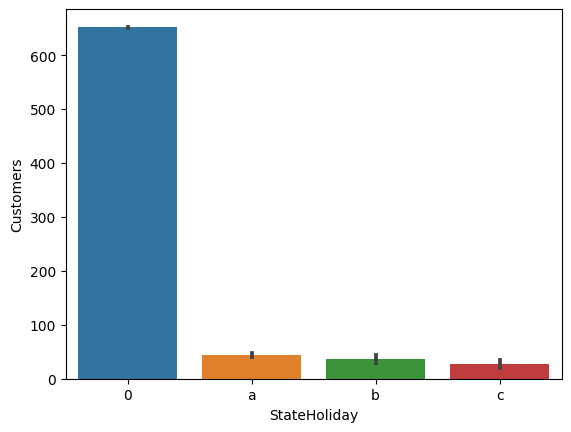

In [13]:
# plotting the chart between stateholiday and customers
sns.barplot(x='StateHoliday',y='Customers',data=rossman_df)

1. Why did you pick the specific chart?  

Answer Here.

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

2. What is/are the insight(s) found from the chart?  

Answer Here.   
In stateholiday variable term 0 has most number of customers that is about more than 600 where as a,b,c has least numbers of customers that is less than 100

<Axes: xlabel='StateHoliday', ylabel='Sales'>

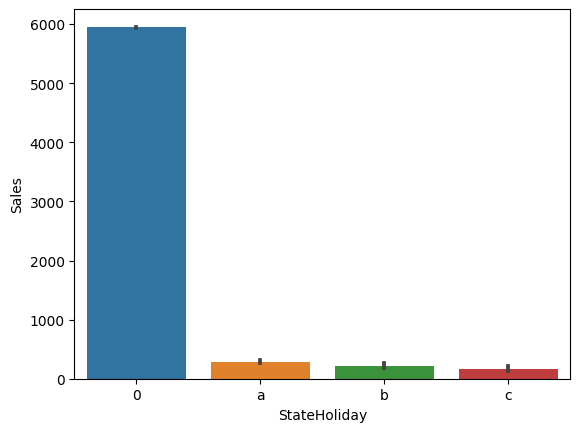

In [ ]:
# plotting the chart between stateholiday and sales
sns.barplot(x='StateHoliday',y='Sales',data=rossman_df)

1. Why did you pick the specific chart?  

Answer Here.

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

2. What is/are the insight(s) found from the chart?  

Answer Here.   
we can observe here that sales are increasing on stateholidays 0 while on other stateholidays sales where remaining same i.e., less than 1000


In [8]:
# Replacing 'a', 'b' and 'c' with 1
rossman_df.StateHoliday.replace({'a': 1,
                                'b' : 1,
                                'c' : 1
                                }, inplace = True )

In [9]:
rossman_df['StateHoliday'].value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

replacing is done because to make the variable in binary format like  true or false , 0 or 1 . it will be easy to understand and visualize them

In [10]:
# extracting datetime data
rossman_df['year']=pd.to_datetime(rossman_df['Date']).dt.year
rossman_df['month']=pd.to_datetime(rossman_df['Date']).dt.month
rossman_df['day']=pd.to_datetime(rossman_df['Date']).dt.day
rossman_df['Week_of_year']=pd.to_datetime(rossman_df['Date']).dt.weekofyear

<ipython-input-10-293ae533e107>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  rossman_df['Week_of_year']=pd.to_datetime(rossman_df['Date']).dt.weekofyear


here we extracting the year month day week and giving them seperate column to understand and visualize the sales according to date month and year

<Axes: xlabel='StateHoliday', ylabel='Sales'>

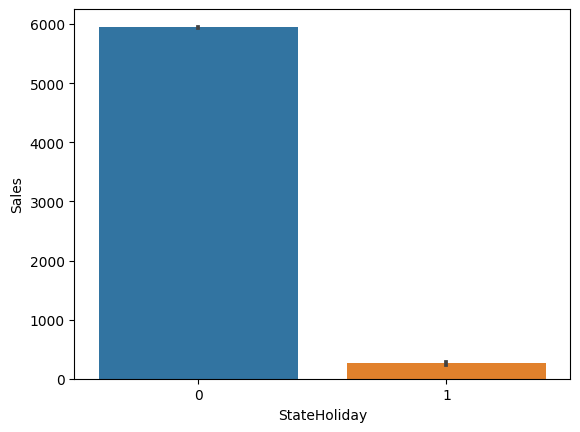

In [ ]:
# observing the plot between varibles
sns.barplot(x=rossman_df['StateHoliday'],y=rossman_df['Sales'])

1. Why did you pick the specific chart?  

Answer Here.

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

2. What is/are the insight(s) found from the chart?  

Answer Here.   
the same plot we can see here that the term 0 contains highest number of sales and 1 contains less number of sales

<Axes: xlabel='SchoolHoliday', ylabel='Sales'>

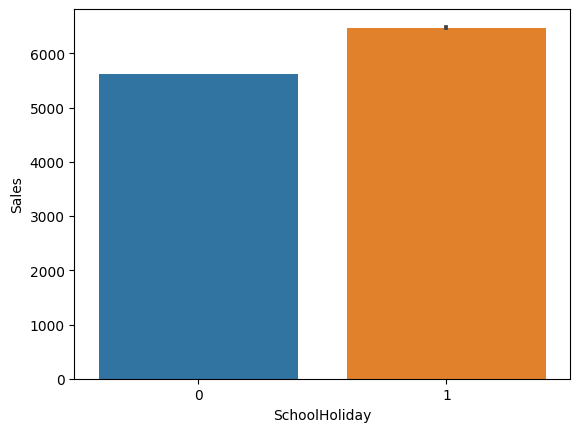

In [ ]:
# observing the charts betweeen the school holiday and sales
sns.barplot(x='SchoolHoliday',y='Sales',data=rossman_df)

1. Why did you pick the specific chart?  

Answer Here.

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

2. What is/are the insight(s) found from the chart?  

Answer Here.   
By this barplot we can observe that when school holiday was 1 then sales increases while when school holiday was 0 then the sales decreases

<Axes: xlabel='StateHoliday', ylabel='Customers'>

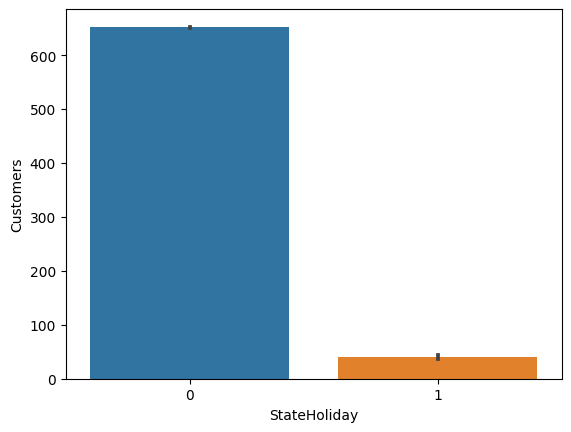

In [ ]:
# visualizing the chart between state holiday and customers
sns.barplot(x='StateHoliday',y='Customers',data=rossman_df)

1. Why did you pick the specific chart?  

Answer Here.

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

2. What is/are the insight(s) found from the chart?  

Answer Here.   
when the state holiday was 0 then the customers increases and while when stateholiday was 1 then the customers were low


<Axes: xlabel='SchoolHoliday', ylabel='Customers'>

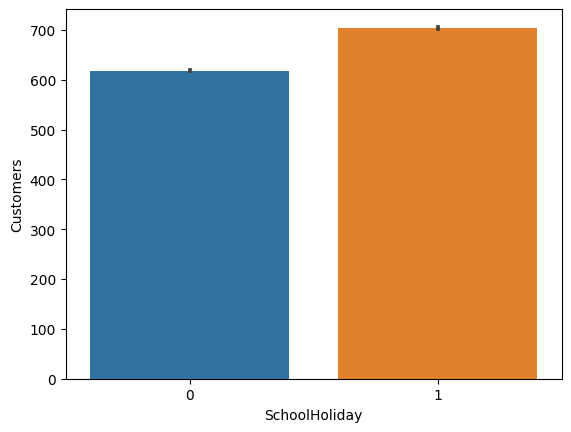

In [ ]:
# visualizing the chart between the schoolholiday and customers
sns.barplot(x='SchoolHoliday',y='Customers',data=rossman_df)

1. Why did you pick the specific chart?  

Answer Here.

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

2. What is/are the insight(s) found from the chart?  

Answer Here.   

here we can obsereve the number of customers where present when store were closed and open on school holiday that is about 600 customers were present when store were closed and more than 700 customers were present when store was open.


<Axes: xlabel='Open', ylabel='count'>

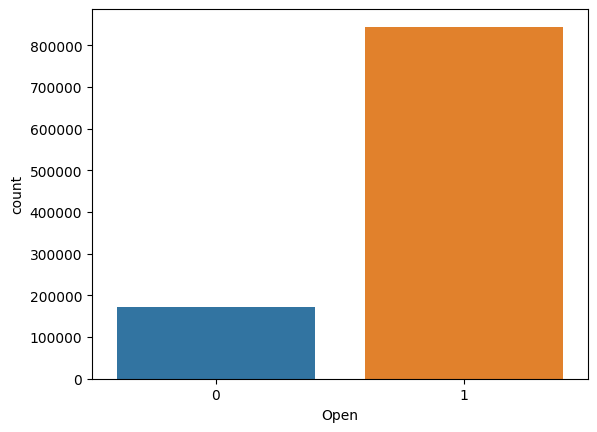

In [ ]:
# counting the number of stores were open and closed in open variable
sns.countplot(x='Open',data=rossman_df)

1. Why did you pick the specific chart?  

Answer Here.

A count chart can effectively show the count of store in open category in a clear and concise way. Each category can be represented by a bar, with the height of the bar indicating the count whether the store is open or closed.


2.  What is/are the insight(s) found from the chart?  

Answer Here  

most of the store where open upto more than 8 lakh where closed store represent 0 so here we can see that it has least number upto less than two lakh

<Axes: xlabel='Open', ylabel='count'>

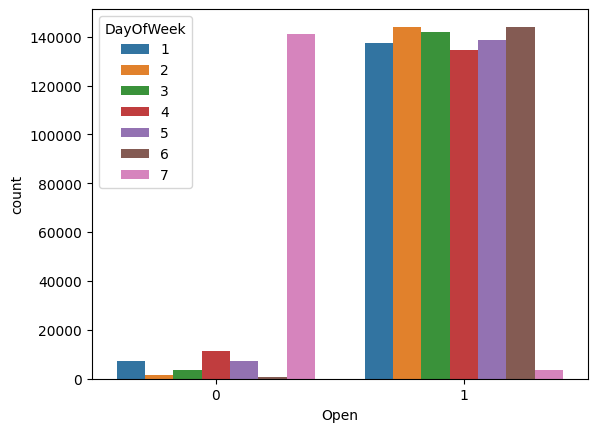

In [ ]:
# counting the store were open and closed on the basis of weekdays
sns.countplot(x='Open',hue='DayOfWeek',data=rossman_df)

1. Why did you pick the specific chart?  

Answer Here.

A count chart can effectively show the count of store for each open category in a clear and concise way. Each category can be represented by a bar, with the height of the bar indicating the count of store whether it is open or closed for that category.

2. What is/are the insight(s) found from the chart?  

Answer Here.  

here this plot shows the most of times stores closed on day 7 i.e, sunday.more than 120000 store where closed on sunday whereas store were open on remaining week day

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

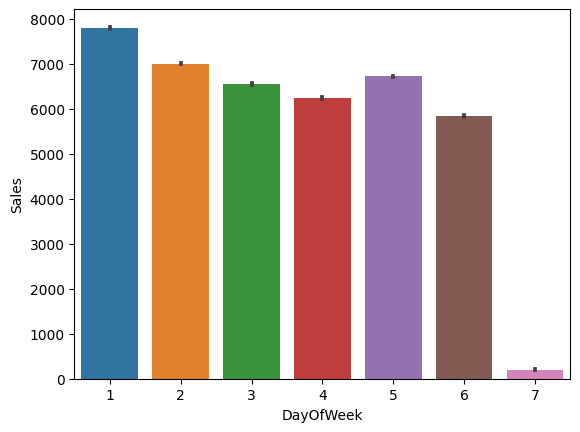

In [ ]:
# visualizing the chart between the weekday and sales for how sales were increasing on basis of weekday
sns.barplot(x='DayOfWeek',y='Sales',data=rossman_df)

1. Why did you pick the specific chart?

Answer Here.

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

2. What is/are the insight(s) found from the chart?

Answer Here.   
we can see in this chart that the sales were very low on the week day 7 that is on sunday . remaining week days show the high sales , on that on monday sales was very high to the remaining week days that is about more than 7000

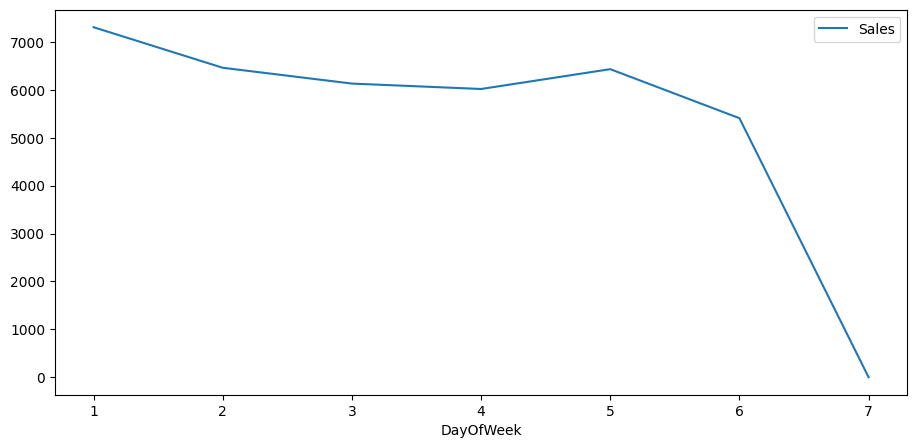

In [ ]:
# visualizing the dayofweek and sales variable using line chart for understanding using line
sales_vs_day= rossman_df.groupby('DayOfWeek')[['Sales']].median().plot(figsize = (11,5))


1. Why did you pick the specific chart?

Answer Here.

The line plot is a common and widely used chart type for visualizing numerical datatypes,The line plot is a common and widely used chart type for visualizing numerical data types ,Line plot is a type of chart that displays information as a series of data points connected by straight line segments. Line plots are generally used to visualize the directional movement of one or more data over time..

2.  What is/are the insight(s) found from the chart?

Answer Here.  
we can see here that on week 7 that is on sunday the sales were decreased with respect to the remaining week day because the maximum stores were closed on sunday


<Axes: xlabel='DayOfWeek', ylabel='Customers'>

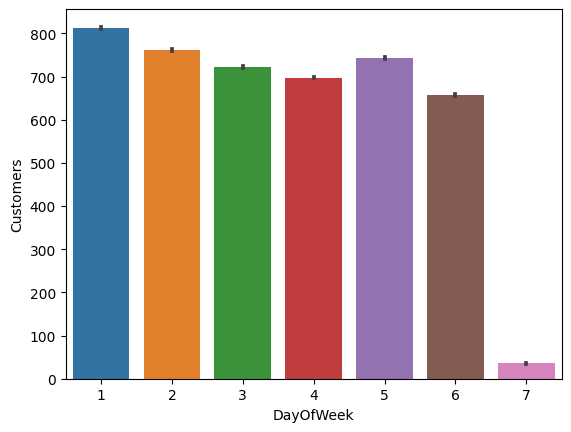

In [ ]:
# visualizing the chart between dayofweek and customers variable to understand the stands of customers on basis of week day
sns.barplot(x='DayOfWeek',y='Customers',data=rossman_df)

1. Why did you pick the specific chart?

Answer Here.

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

2. What is/are the insight(s) found from the chart?

Answer Here.  

most of the sales are done on first 6 days and on 7th day it shows the minimum sales because maximum stores were closed on sunday so that very customers were attended

<Axes: title={'center': 'Sales'}, xlabel='year'>

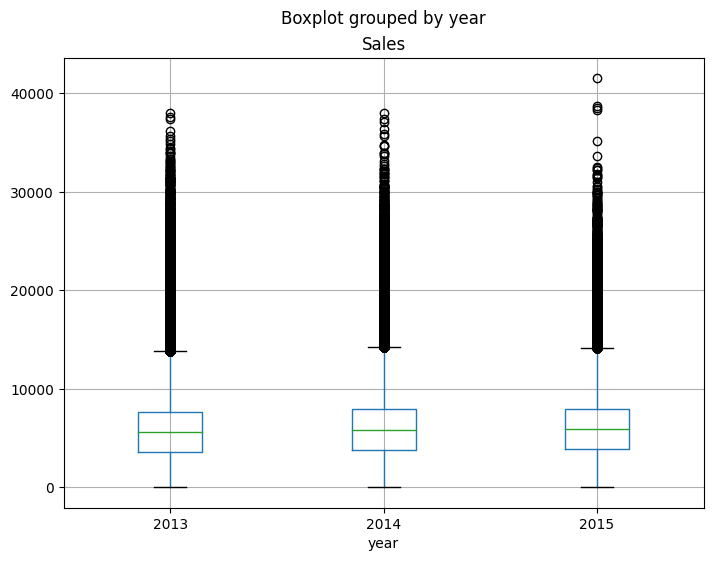

In [ ]:
# visualizing the outliers between sales and year
rossman_df.boxplot('Sales','year',figsize=(8,6))

1. why do you pick the specific chart ?  

answer .

the box plot chart is used for finding the outliers present in the following variables or not . this plot is widely preferred for the outliers for numerical variable.  

2. what are the insights from the chart.

answer.

from these graph we can see that there is no outliers in this variable

<Axes: title={'center': 'Sales'}, xlabel='month'>

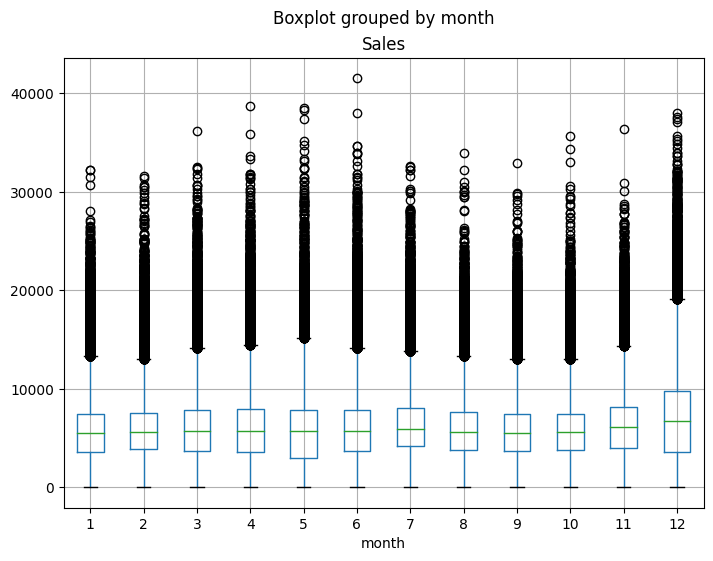

In [ ]:
# visualizing the outliers between sales on the basis of month using boxplot
rossman_df.boxplot('Sales','month',figsize=(8,6))

1. why do you pick the specific chart ?  

answer .  

the box plot chart is used for finding the outliers present in the following variables or not . this plot is widely preferred for the outliers for numerical variable.

2. what are the insights from the chart.  

answer.   

we can see here no outliers present in the following months

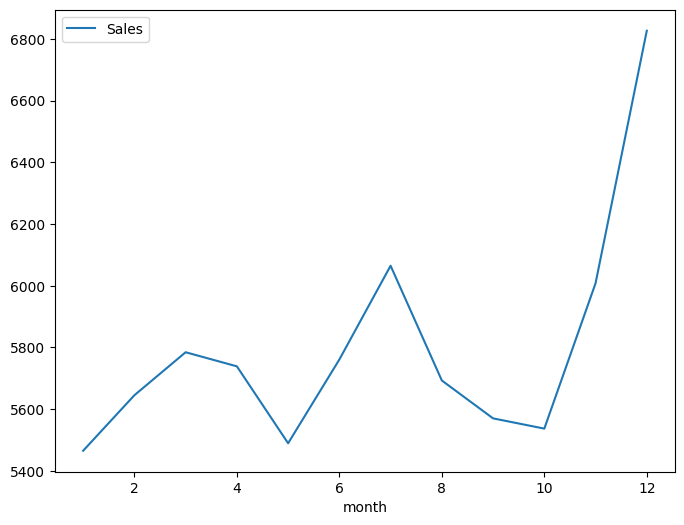

In [ ]:
# visualizing the sales through line plot on the basis of month
sales_vs_month=rossman_df.groupby('month')[['Sales']].mean().plot(figsize=(8,6))

1. Why did you pick the specific chart?

Answer Here.

The line plot is a common and widely used chart type for visualizing numerical data types ,Line plot is a type of chart that displays information as a series of data points connected by straight line segments. Line plots are generally used to visualize the directional movement of one or more data over time.

2. What is/are the insight(s) found from the chart?

Answer Here   .

here clearly observe that the sales increase in last month of a year that is months 11th and 12th

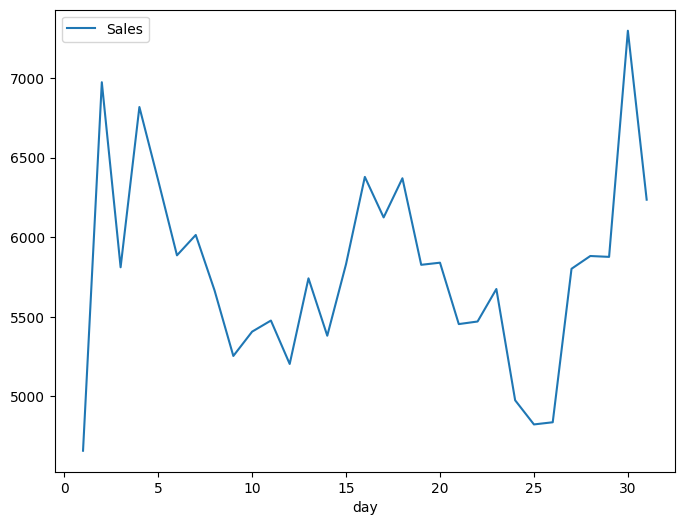

In [ ]:
# trend of avg sales per day of month
avg_sales_vs_day=rossman_df.groupby('day')[['Sales']].mean().plot(figsize=(8,6))

1. Why did you pick the specific chart?

Answer Here.

The line plot is a common and widely used chart type for visualizing numerical data types ,Line plot is a type of chart that displays information as a series of data points connected by straight line segments. Line plots are generally used to visualize the directional movement of one or more data over time.

2. What is/are the insight(s) found from the chart?

Answer Here  

we can clearly see that the sales were increasing on starting days and last days of the months and on middle period they are less likely to increase

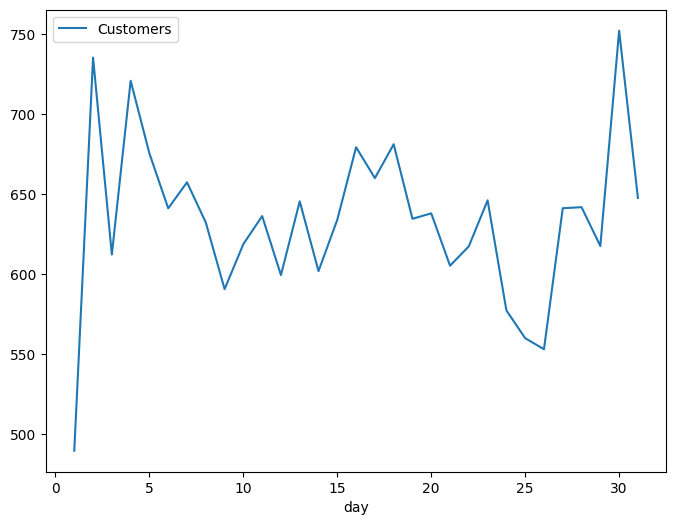

In [ ]:
# trend of avg customers per day of month
avg_cust_vs_day=rossman_df.groupby('day')[['Customers']].mean().plot(figsize=(8,6))

1. Why did you pick the specific chart?

Answer Here.

The line plot is a common and widely used chart type for visualizing numerical data types ,Line plot is a type of chart that displays information as a series of data points connected by straight line segments. Line plots are generally used to visualize the directional movement of one or more data over time.

2. What is/are the insight(s) found from the chart?

Answer Here   

 we previously observed that the sales were increaing on first and last days of a month that is due to customers increased we can clearly see it in this line plot


In [11]:
# dropping 0 in open because it shows that store is closed
new_ross_df=rossman_df[rossman_df['Open']!=0]

In [12]:
# dropping the open column from data
new_ross_df.drop('Open',axis=1,inplace=True)

<ipython-input-12-86e50b447053>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_ross_df.drop('Open',axis=1,inplace=True)


In [13]:
#making a copy of the dataset
rossman_data=new_ross_df.copy()

<ipython-input-14-086584da4f8d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rossman_data['Sales'])


<Axes: xlabel='Sales', ylabel='Density'>

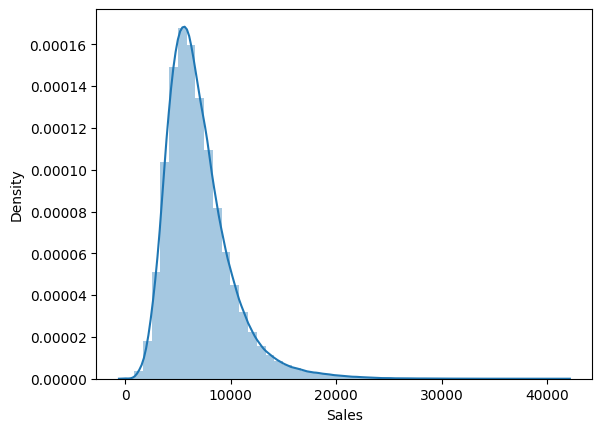

In [14]:
# visualizing the charts of the sales variables using displot
sns.distplot(rossman_data['Sales'])

1. why you picked the specific chart ?  

answer here.  

data distribution refers to the manner in which data is spread out across different values1. A distplot or distribution plot is a way to depict the variation in the data distribution.   

2. what are the insights from the chart .

answer here.  

it performig the perfect normal distribution form

In [21]:
# information of the copied dataset variables
rossman_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          844392 non-null  int64 
 1   DayOfWeek      844392 non-null  int64 
 2   Date           844392 non-null  object
 3   Sales          844392 non-null  int64 
 4   Customers      844392 non-null  int64 
 5   Promo          844392 non-null  int64 
 6   StateHoliday   844392 non-null  int64 
 7   SchoolHoliday  844392 non-null  int64 
 8   year           844392 non-null  int64 
 9   month          844392 non-null  int64 
 10  day            844392 non-null  int64 
 11  Week_of_year   844392 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 83.7+ MB


In [15]:
# creating a list of all numerical feature
num_features=list(rossman_data.describe().columns)

# removing store id and sales
num_features.remove('Store')
num_features.remove('Sales')

num_features

['DayOfWeek',
 'Customers',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'year',
 'month',
 'day',
 'Week_of_year']

relationship between numerical features and target variable

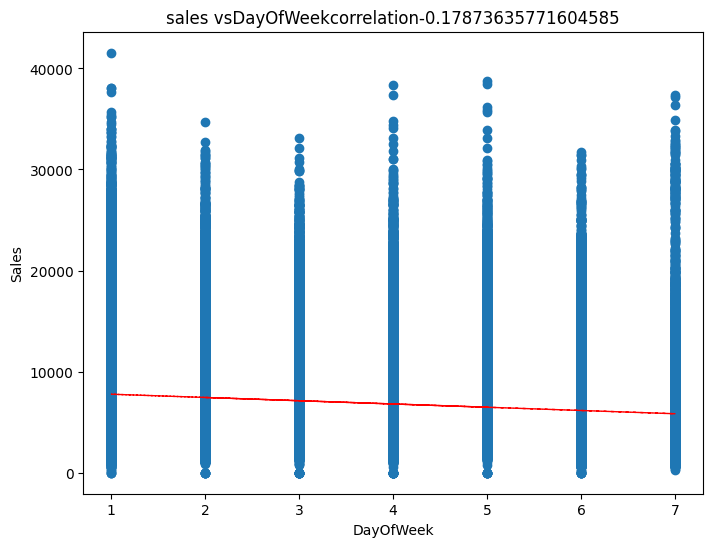

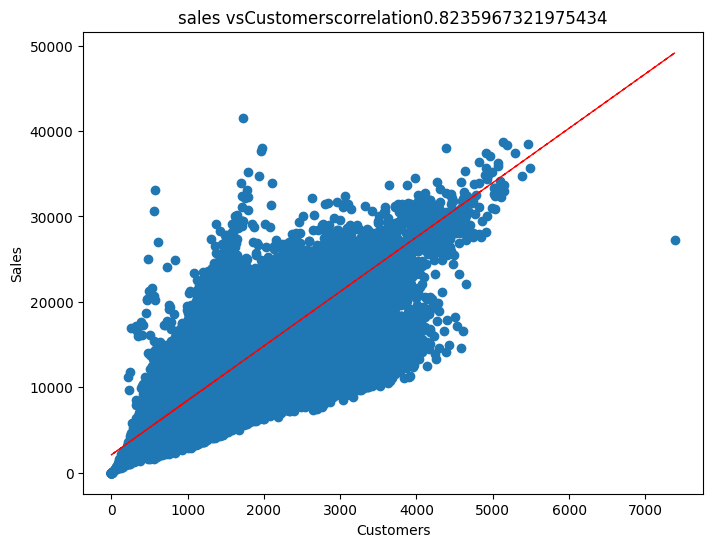

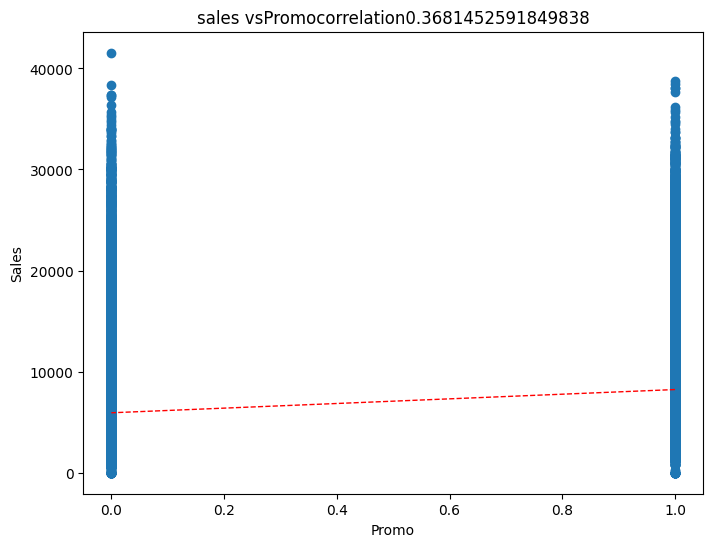

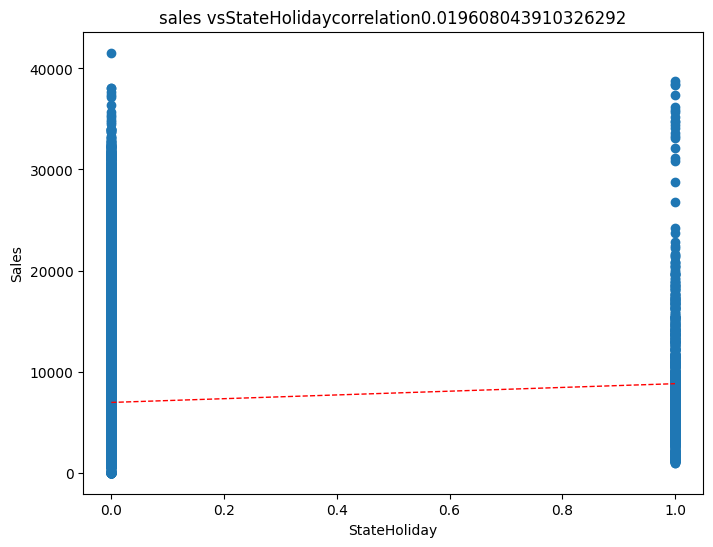

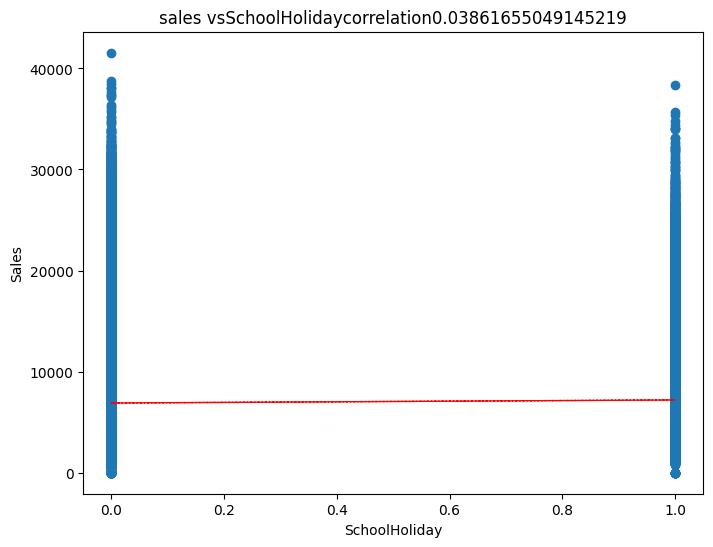

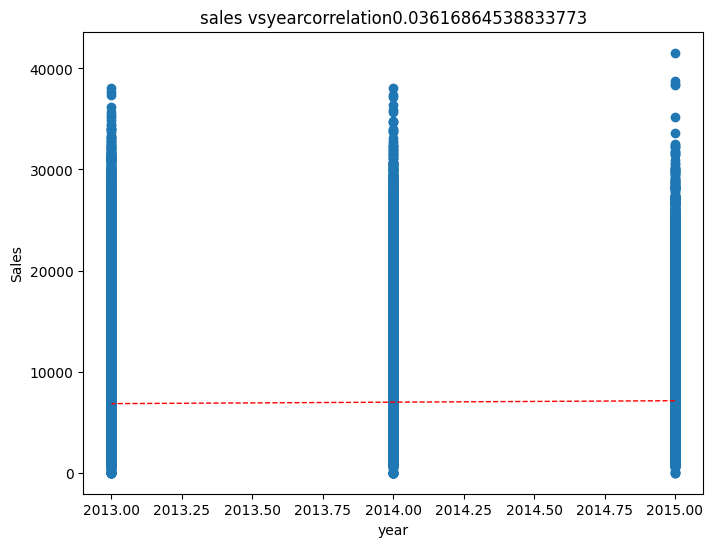

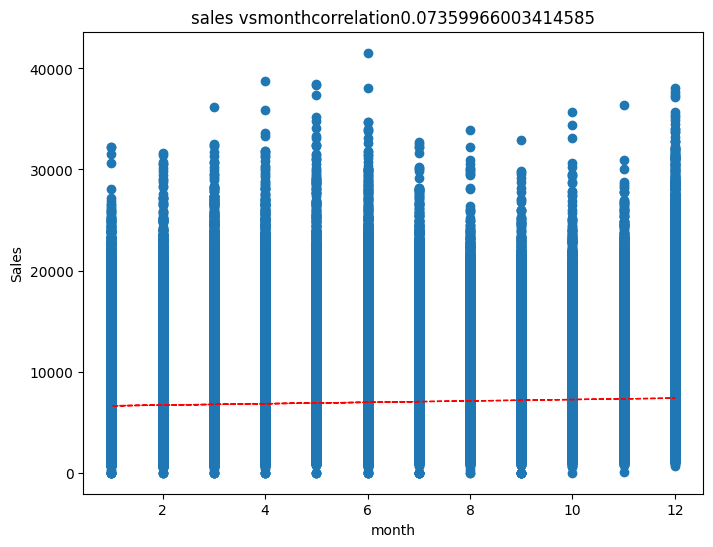

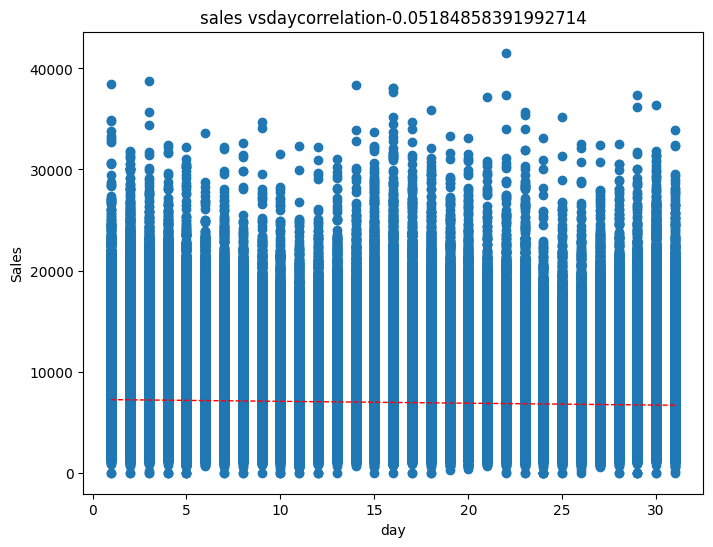

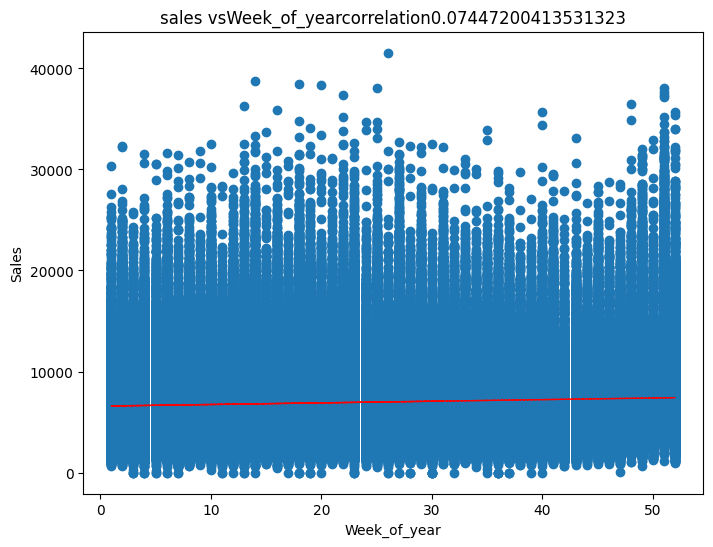

In [16]:
for i in num_features:
  fig=plt.figure(figsize=(8,6))
  feature=new_ross_df[i]
  label=new_ross_df['Sales']

  # correlation coefficient
  correlation=feature.corr(label)

  # plot
  plt.scatter(feature,label)
  plt.xlabel(i)
  plt.ylabel('Sales')
  plt.title('sales vs'+i+'correlation'+str(correlation))

  # getting best fit line

  slope,intercept=np.polyfit(feature,label,1)
  plt.plot(feature,slope*feature+intercept, "r--", lw = 1)
plt.show()



<ipython-input-17-b6adb8e89fec>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rossman_df.corr())


<Axes: >

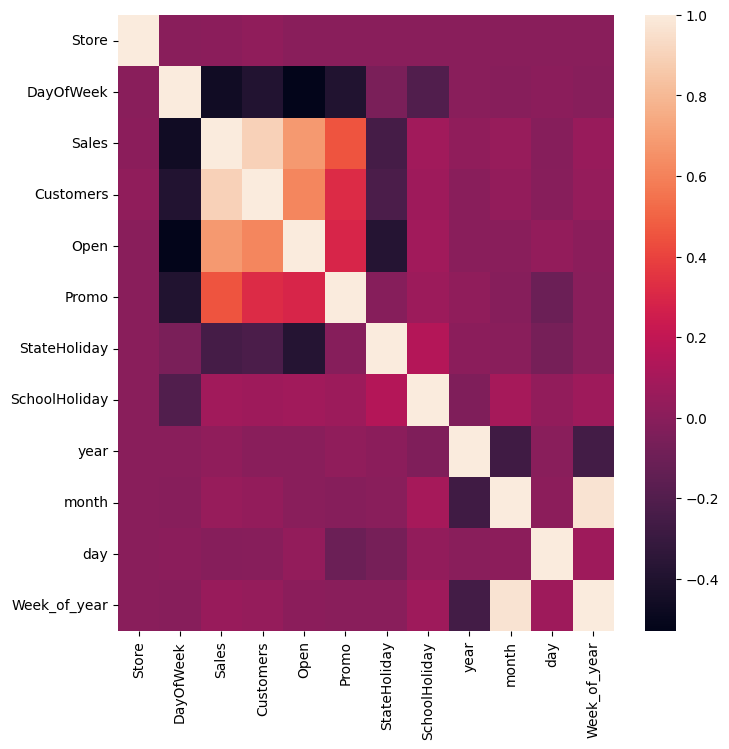

In [17]:
# understading relationship between variables using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(rossman_df.corr())


In [18]:
# loading store data
store_df=pd.read_csv('/content/drive/MyDrive/store.csv')
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


The head method shows the top 5 rows and all the columns of the dataset where we can see here that it conntains 10 columns i.e., 'Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'

In [ ]:
# all columns of the dataset
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# shape of store data
store_df.shape

(1115, 10)

shape method shows the shape of the data that is number of rows and columns . so we can see here that they are 1115 rows and 10 columns

In [ ]:
# gives summary of store data
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


describe method shows all the cathegorical variables present in the dataset and it also gives the basic information of the dataset.  
Like we can see here that they are present of outliers in the competition distance variable

In [25]:
# summary of the all columns
store_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


by using include all in the describe funnction we can see the summary of all variables i.e., both cathegorical and numerical variable
we can also here that they are presence of null values

In [ ]:
# seeing any duplicate value present or not
store_df.duplicated().any()

False

great they are no duplicate value here

In [ ]:
# information about the variables
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


by this we can see that They are presence of missing values mostly in promo2sinceweek,promo2sinceyear,promointerval  i.e., half of the data are missing on those 3 variables

they are 7 numerical variables and 3 cathegorical variables

In [ ]:
# seeing how much values are missing in variables
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

we can see here that nearly half of the values are missing in last three variables and competitionopensincemonth and competitionopensinceyear are having 354 missing values

so we can remove the varibles which has half missing values

<Figure size 3000x400 with 0 Axes>

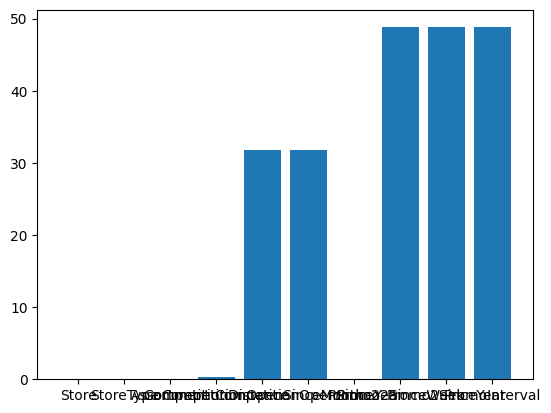

<Figure size 3000x400 with 0 Axes>

In [ ]:
# calculating missing value percentages through barplot
column=store_df.columns
missing_values=(store_df.isnull().sum()/len(store_df)*100)


plt.bar(missing_values.index,missing_values.values)
plt.figure(figsize=(30,4))

1. Why did you pick the specific chart?

Answer Here.

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

2. What is/are the insight(s) found from the chart?

Answer Here.  

here we can observe that they are missing values and most of them are present in the CompetitionOpenSinceMonth,commpetitionOpenSinceYear,and
variables like Promo2SinceWeek,Promo2SinceYear and PromoInterval having 50% null values so we can drop these columns

#Data Wrangling

##Handling Missing values

<Figure size 800x600 with 0 Axes>

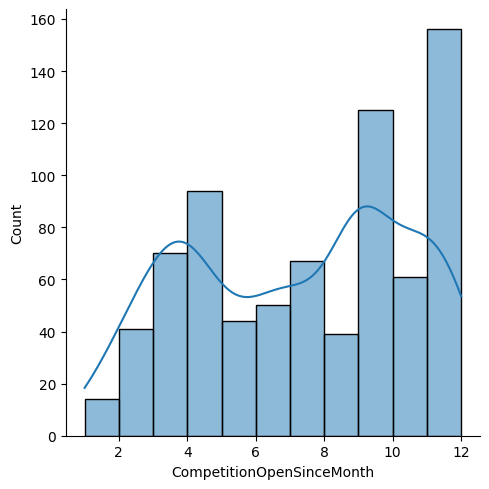

<Figure size 800x600 with 0 Axes>

In [ ]:
# understanding the data distribution of the column CompetitionOpenSinceMonth
sns.displot(store_df['CompetitionOpenSinceMonth'],kde=True)
plt.figure(figsize=(8,6))

1. why you picked the specific chart ?  

answer here.

data distribution refers to the manner in which data is spread out across different values1. A distplot or distribution plot is a way to depict the variation in the data distribution.

2. what are the insights from the chart .  

answer here.  

we can see that when months increasing the competitor was also inncreasing

<Figure size 800x600 with 0 Axes>

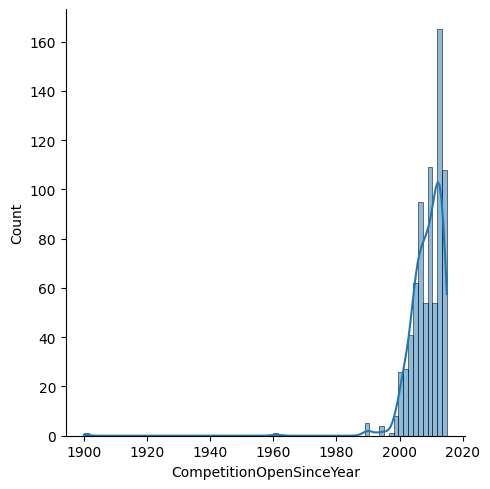

<Figure size 800x600 with 0 Axes>

In [ ]:
#  understanding the data distribution of the column CompetitionOpenSinceyear
sns.displot(store_df['CompetitionOpenSinceYear'],kde=True)
plt.figure(figsize=(8,6))

1. why you picked the specific chart ?  

answer here.

data distribution refers to the manner in which data is spread out across different values1. A distplot or distribution plot is a way to depict the variation in the data distribution.

2. what are the insights from the chart .  

answer here.

we can see that when year increasing the competitor was also inncreasing . in this chart we can see that onn year 2020 competitor was highest number while comparing to the previous year

<Figure size 800x600 with 0 Axes>

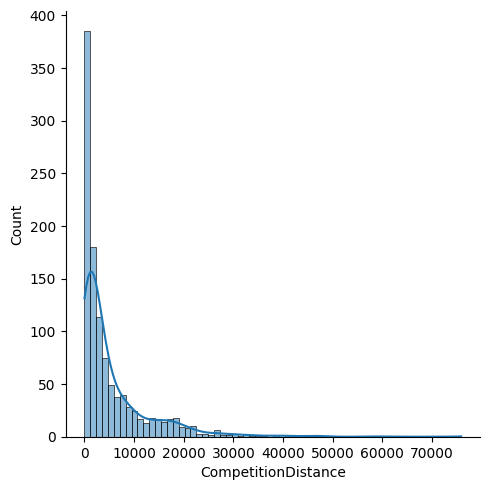

<Figure size 800x600 with 0 Axes>

In [ ]:
# understanding the data distribution of the column Competitiondistance
sns.displot(store_df['CompetitionDistance'],kde=True)
plt.figure(figsize=(8,6))

1. why you picked the specific chart ?  

answer here.

data distribution refers to the manner in which data is spread out across different values1. A distplot or distribution plot is a way to depict the variation in the data distribution.

2. what are the insights from the chart .  

answer here.

so,these graph shows the skewness, where to fill those null values we can use median central tendency but these are the cathegorical variables so instead of using median we use mode here

In [19]:
#filling null values with mode
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0],inplace=True)
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)



In [20]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].mode()[0],inplace=True)

In [21]:
# finding how much null values present in each column
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

we can see here that the 3 columns that is Promo2SinceWeek,Promo2SinceYear,PromoInterval having missing values

it has missing values of around 50% so we can drop them

In [22]:
#droping unnecessary columns
columns_to_drop=['Promo2SinceWeek','Promo2SinceYear','PromoInterval']
store_df.drop(columns=columns_to_drop,axis=1,inplace=True)

we dropped this column because of high number of missing values

In [23]:
# seeing whether there is any null values or not
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

after dropping the columns and filling the null value columns we can see here there is no null values present here

In [ ]:
# fiding the unique values in storetype column
store_df['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

we can see here there is 4 different types of stores present in storetype variable namely a,b,c,d

In [ ]:
# finding the unique values in assortment column
store_df['Assortment'].unique()


array(['a', 'c', 'b'], dtype=object)

we can see here there is 3 different types of assortment namely a,b,c

#merging both dataset

In [24]:
# merging using left join
merged_data=pd.merge(new_ross_df,store_df,how='left')

In [25]:
# top 5 values after merging
merged_data.head()


,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,Week_of_year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,31,31,c,a,1270.0,9.0,2008.0,0
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,31,31,a,a,570.0,11.0,2007.0,1
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,31,31,a,a,14130.0,12.0,2006.0,1
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,31,31,c,c,620.0,9.0,2009.0,0
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,31,31,a,a,29910.0,4.0,2015.0,0


so here storetype and assortment are cathegorical variables,so we have to do encodinng here

In [ ]:
# shape of the merged data
merged_data.shape

(844392, 18)

so there is 844392 rows and 18 columns present in the dataset after merging both the dataset

In [ ]:
# information of the merged data
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Promo                      844392 non-null  int64  
 6   StateHoliday               844392 non-null  int64  
 7   SchoolHoliday              844392 non-null  int64  
 8   year                       844392 non-null  int64  
 9   month                      844392 non-null  int64  
 10  day                        844392 non-null  int64  
 11  Week_of_year               844392 non-null  int64  
 12  StoreType                  844392 non-null  object 
 13  Assortment                 84

we can observe here there is no missing values available here

In [ ]:
# describing the dataset including all variables
merged_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Store,844392.0,NaN,NaN,NaN,558.42292,321.731914,1.0,280.0,558.0,837.0,1115.0
DayOfWeek,844392.0,NaN,NaN,NaN,3.520361,1.723689,1.0,2.0,3.0,5.0,7.0
Date,844392,942,2014-04-16,1115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,844392.0,NaN,NaN,NaN,6955.514291,3104.21468,0.0,4859.0,6369.0,8360.0,41551.0
Customers,844392.0,NaN,NaN,NaN,762.728395,401.227674,0.0,519.0,676.0,893.0,7388.0
Promo,844392.0,NaN,NaN,NaN,0.446352,0.497114,0.0,0.0,0.0,1.0,1.0
StateHoliday,844392.0,NaN,NaN,NaN,0.001078,0.032811,0.0,0.0,0.0,0.0,1.0
SchoolHoliday,844392.0,NaN,NaN,NaN,0.19358,0.395103,0.0,0.0,0.0,0.0,1.0
year,844392.0,NaN,NaN,NaN,2013.831937,0.77726,2013.0,2013.0,2014.0,2014.0,2015.0
month,844392.0,NaN,NaN,NaN,5.845738,3.323931,1.0,3.0,6.0,8.0,12.0


In [33]:
# observing is their any duplicate value or not
merged_data.duplicated().any()

False

so there is no duplicate value here

we can observe the linearity between new variables

<Figure size 800x600 with 0 Axes>

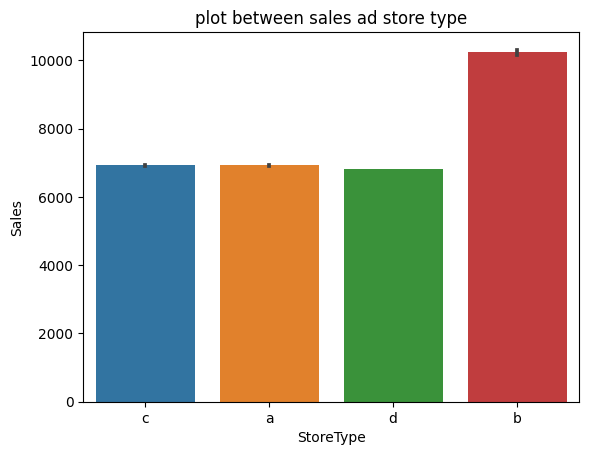

<Figure size 800x600 with 0 Axes>

In [ ]:
# plot between sales and store type
sns.barplot(x='StoreType',y='Sales',data=merged_data)
plt.title('plot between sales ad store type')
plt.figure(figsize=(8,6))


1. Why did you pick the specific chart?

Answer Here.

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

2. What is/are the insight(s) found from the chart?

Answer Here.  

b type store has more number of sales when comapring with the other 3 store type

<Axes: xlabel='Assortment', ylabel='Sales'>

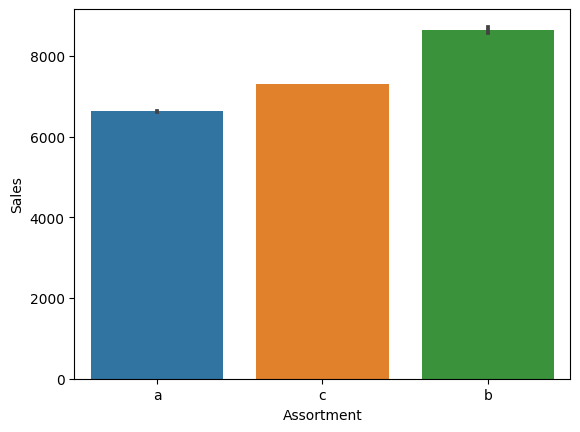

In [ ]:
# plot betwen  assortment and sales
sns.barplot(x='Assortment',y='Sales',data=merged_data)

1. Why did you pick the specific chart?

Answer Here.

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

2. What is/are the insight(s) found from the chart?

Answer Here.  

b type assortment has most sales while comapring to other types of assortment

<Axes: xlabel='Promo2', ylabel='Sales'>

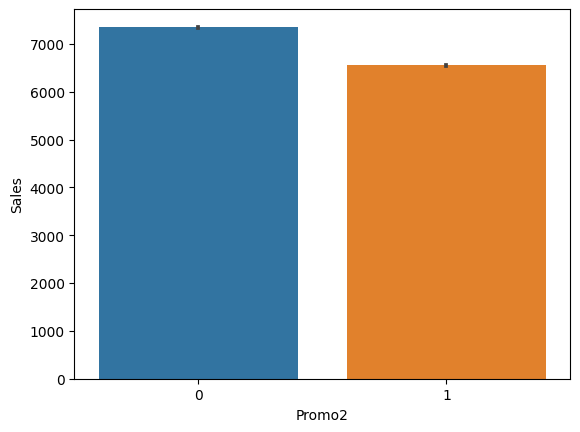

In [ ]:
# plot between promo2 and sales
sns.barplot(x='Promo2',y='Sales',data=merged_data)

1. Why did you pick the specific chart?

Answer Here.

The bar plot is a common and widely used chart type for visualizing categorical data, such as dates or categories, with a discrete count or frequency associated with each category.

2. What is/are the insight(s) found from the chart?

Answer Here.  

the store which is not participating for the promotion day has the highest number of sales while the stores which is participating has some less sales



<Axes: xlabel='CompetitionOpenSinceMonth', ylabel='Sales'>

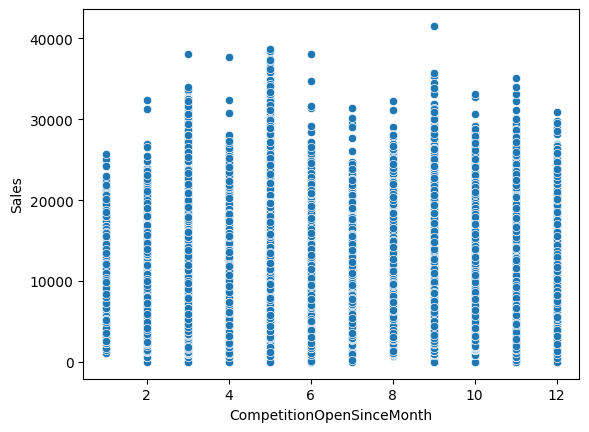

In [ ]:
# plot between sales and competition month and year
sns.scatterplot(x='CompetitionOpenSinceMonth',y='Sales',data=merged_data)

1. why you used this specific chart ?   

answer here.

a scatter plot is a type of data visualization that is used to represent the relationship between two numerical variables.

2. what are the insights found from the chart.  

answer here.  

sales by the competitors were almost same in all months they are slighty increasing and decreasing in the period


<Axes: title={'center': 'CompetitionOpenSinceMonth vs sales'}, xlabel='CompetitionOpenSinceMonth', ylabel='Sales'>

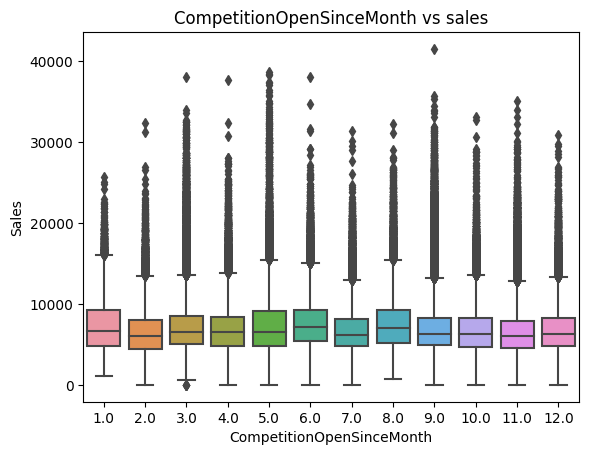

In [ ]:
# finding the outliers using boxplot
plt.title('CompetitionOpenSinceMonth vs sales')
sns.boxplot(x='CompetitionOpenSinceMonth',y='Sales',data=merged_data)

1. why do you pick the specific chart ?  

answer .  

the box plot chart is used for finding the outliers present in the following variables or not . this plot is widely preferred for the outliers for numerical variable.

2. what are the insights found from the chart.  

answer.  

there are no outliers in the CompetitionOpenSinceMonth vs sales chart

EDA findings:  
The best-selling and most frequently visited by customers is store of type A.  
For all stores, promotion leads to increased sales and customers.  
Sales are strongly correlated to the number of customers.  
Stores open during school holidays have more sales than on normal days.  
Each time a store participates in a promotion, we see Sales and number of customers increase significantly.  
More stores are open during school holidays than on public holidays.  
Sales increase during Christmas week, this may be due to people buying gifts during a Christmas holidays.

<ipython-input-72-ec5edb1c9450>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_data.corr(),annot=True)


<Axes: title={'center': 'correlation between variables'}>

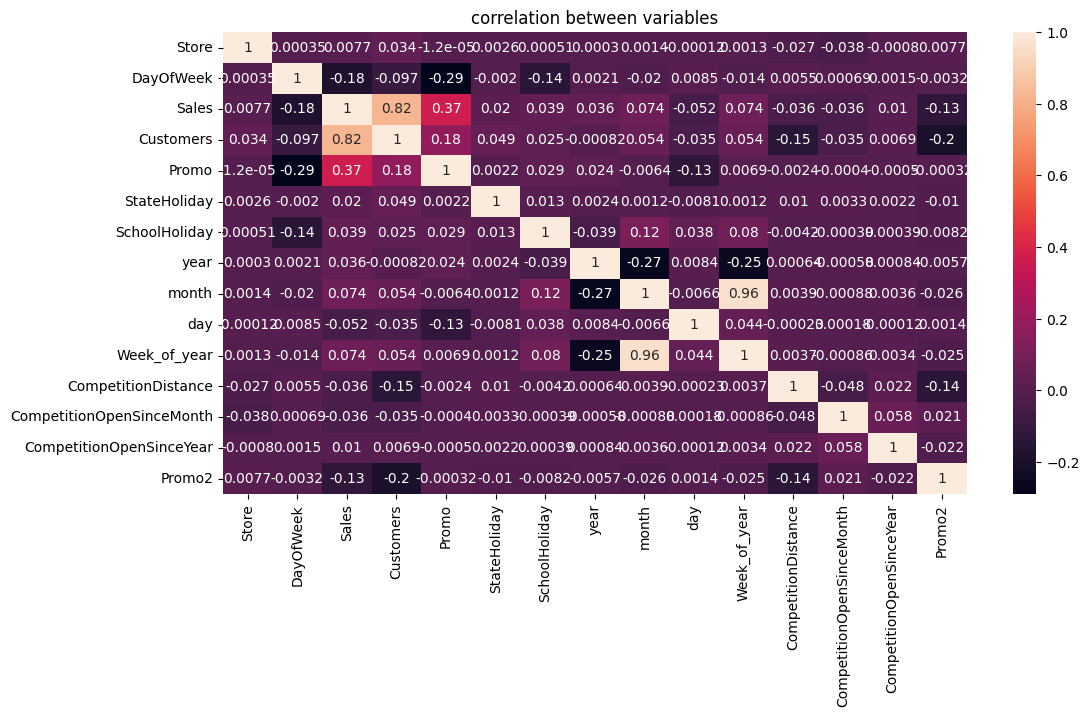

In [ ]:
# checking  for the multicollinearity
plt.figure(figsize=(12,6))
plt.title('correlation between variables')
sns.heatmap(merged_data.corr(),annot=True)

#Label Encoding

assigning each of the following categorical columns an integer value based on alphhabetical order

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

merged_data['StoreType']=label_encoder.fit_transform(merged_data['StoreType'])
merged_data['Assortment']=label_encoder.fit_transform(merged_data['Assortment'])

merged_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,year,month,day,Week_of_year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,31,31,2,0,1270.0,9.0,2008.0,0
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,31,31,0,0,570.0,11.0,2007.0,1
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,31,31,0,0,14130.0,12.0,2006.0,1
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,31,31,2,2,620.0,9.0,2009.0,0
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,31,31,0,0,29910.0,4.0,2015.0,0


#variance inflation factor

Multicollinearity refers to the presence of strong correlations between predictor variables, which can lead to unreliable and unstable model estimates. VIF quantifies the extent of correlation between one predictor and the other predictors in a model, and higher values signify that it is difficult to impossible to assess accurately the contribution of predictors to a model1.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(x):
  vif=pd.DataFrame()
  vif['variables']=x.columns
  vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

  return(vif)



In [28]:
calculate_vif(merged_data[[i for i in merged_data.describe().columns if i not in ['Sales']]])



,variables,VIF
0,Store,4.027186
1,DayOfWeek,5.770742
2,Customers,5.405042
3,Promo,2.077114
4,StateHoliday,1.004218
5,SchoolHoliday,1.307883
6,year,141232.139616
7,month,57.078753
8,day,4.585020
9,Week_of_year,51.268336


we can see that their are many variables who has variance inflation factor high so we can remove them

In [29]:
# removing the features which having VIF>10
calculate_vif(merged_data[[i for i in merged_data.describe().columns if i not in ['Sales','year','CompetitionOpenSinceYear','month','Week_of_year']]])


,variables,VIF
0,Store,3.627383
1,DayOfWeek,4.513309
2,Customers,4.333250
3,Promo,1.945729
4,StateHoliday,1.003891
5,SchoolHoliday,1.247538
6,day,3.847937
7,StoreType,1.915873
8,Assortment,2.043605
9,CompetitionDistance,1.530801


In [30]:
# creating a dataset whose vif  less than 10
merged_data_vif=merged_data[[i for i in merged_data.describe().columns if i not in ['Sales','year','CompetitionOpenSinceYear','month','Week_of_year']]].head()
merged_data_vif.head()

,Store,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2
0,1,5,555,1,0,1,31,2,0,1270.0,9.0,0
1,2,5,625,1,0,1,31,0,0,570.0,11.0,1
2,3,5,821,1,0,1,31,0,0,14130.0,12.0,1
3,4,5,1498,1,0,1,31,2,2,620.0,9.0,0
4,5,5,559,1,0,1,31,0,0,29910.0,4.0,0


In [31]:
# we can delete store id
merged_data_vif.drop('Store',axis=1,inplace=True)

In [32]:
merged_data_vif.head()

,DayOfWeek,Customers,Promo,StateHoliday,SchoolHoliday,day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2
0,5,555,1,0,1,31,2,0,1270.0,9.0,0
1,5,625,1,0,1,31,0,0,570.0,11.0,1
2,5,821,1,0,1,31,0,0,14130.0,12.0,1
3,5,1498,1,0,1,31,2,2,620.0,9.0,0
4,5,559,1,0,1,31,0,0,29910.0,4.0,0


we can see here that the column store id has been removed and the column which is linear to each other that means it shows high variance inflation factor that column has been removed and created a new dataset

so the next step we are going to do is modeling the dataset and verifying the accuracy and test

#ML modeling

In [33]:
# importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor


In [34]:
# importing metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae


In [35]:
# copy of a merged df
merged_df=merged_data.copy()

In [36]:
# log transforming the sales
merged_df['Sales']=np.log10(merged_df['Sales'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
# check for inf values
np.isinf(merged_df['Sales']).sum()

54

here we can see that there is 54 infinite values in sales column so we have to remove them because having infinite values may lead to numerical instability so we have to remove them . By Removing them ensures compatibility and smooth execution of your code.

In [38]:
# droping infinite values after transformation
merged_df.drop(merged_df[merged_df['Sales'] == float("-inf")].index,inplace=True)


In [39]:
# log10 transformation values after transformation
merged_df['Customers']=np.log10(merged_df['Customers'])

In [40]:
# checking for inf values
np.isinf(merged_df['Customers']).sum()

0

In [41]:
# declaring the dependent variables and independent variables
dependent_var='Sales'
independent_var=merged_data_vif.columns

In [42]:
independent_var

Index(['DayOfWeek', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'day', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'Promo2'],
      dtype='object')

In [43]:
# creating a dataframe of independent variables and dependent variables
X=merged_df[independent_var].values
Y=merged_df[dependent_var].values

In [44]:
# splitting te dataset in train and test
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)

(675470, 11)
(168868, 11)


here we splitted the dataset in train and test form   
so,we splitted it in 80% and 20% .so we can see the shape of our train and test  

In [45]:
# using standard scaler to normalize the independent variables
scaler=StandardScaler()
scaled_x_train=scaler.fit_transform(X_train)
scaled_x_test=scaler.transform(X_test)

Normalization is a preprocessing technique used in machine learning to scale and standardize the features of a dataset

#Linear Regression

Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.

In [46]:
# fitting multiple linnear regression to the trainnig dataset
regressor=LinearRegression()
regressor.fit(scaled_x_train,Y_train)

LinearRegression()

In [47]:
# interccept of the equation
regressor.intercept_

3.803451468689068

the term "intercept" refers to the y-intercept or the constant term in the linear equation that represents the relationship between independent variables and the dependent variable

In [48]:
# model coefficients
regressor.coef_

array([-0.00312071,  0.1600843 ,  0.03453636, -0.00316938,  0.00131155,
        0.00032467,  0.03185349,  0.01032432,  0.01548148, -0.00176238,
        0.01307625])

In [49]:
# predicted sales from training dataset
y_pred_train=regressor.predict(scaled_x_train)

# predcting sales from testing dataset
y_pred_test=regressor.predict(scaled_x_test)

In [88]:
print(y_pred_train)
print(y_pred_test)

[3.72104416 3.68350475 3.8663986  ... 3.7067928  3.99467701 4.19833109]
[3.75192668 4.00631964 3.95347144 ... 3.41976134 3.61445506 3.52751242]


In [50]:
# defining RMSE fun
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(X,Y):
  return sqrt(mean_squared_error(X,Y))

# defining MAPE fun
def mape(X,Y):
  return np.mean(np.abs((X-Y)/X))*100

In [51]:
# evaluation metrics for linear regression

print("Regresion Model Training Score" , ":" , regressor.score(scaled_x_train, Y_train),
      "Model Test Score" ,":" , regressor.score(scaled_x_test, Y_test))

print("Training RMSE", ":", rmse(Y_train, y_pred_train),
      "Testing RMSE", ":", rmse(Y_test, y_pred_test))

print("Training MAPE", ":", mape(Y_train, y_pred_train),
      "Testing MAPE", ":", mape(Y_test, y_pred_test))

r2 = r2_score(Y_test, y_pred_test)
print("R2 :" ,r2)

Regresion Model Training Score : 0.8192947525750629 Model Test Score : 0.8191352091321038
Training RMSE : 0.07848018055196217 Testing RMSE : 0.07867968961725957
Training MAPE : 1.6073976553619296 Testing MAPE : 1.6094630607594684
R2 : 0.8191352091321038


we can see the metrics values of training and testing of rmse,mape,model score

In [52]:
import math

In [53]:
# performance of a model
r2s_lr=r2_score(Y_train,y_pred_train)
r2s2_lr=r2_score(Y_test,y_pred_test)
print('r2_score train:',r2s_lr)
print('r2_score test:',r2s_lr)

mae_lr=mae(Y_train,y_pred_train)
mae2_lr=mae(Y_test,y_pred_test)
print('mae train:',mae_lr)
print('mae2_lr:',mae2_lr)

rmse_lr=math.sqrt(mse(Y_train,y_pred_train))
rmse2_lr=math.sqrt(mse(Y_test,y_pred_test))
print('rmse train:', rmse_lr)
print('rmse2 test:',rmse2_lr)

mse_lr=mse(Y_train,y_pred_train)
mse2_lr=mse(Y_test,y_pred_test)
print('mse train:',mse_lr)
print('mse2 test:',mse2_lr)


r2_score train: 0.8192947525750629
r2_score test: 0.8192947525750629
mae train: 0.06097062909292324
mae2_lr: 0.06104603708118009
rmse train: 0.07848018055196217
rmse2 test: 0.07867968961725957
mse train: 0.00615913873946858
mse2 test: 0.006190493558268303


the model is performing better if metrics like r2 score has high value near to 1 . so in our performance we can see that r2 giving the value of 0.82 hence it is performing well   

we can see that mse,rmse,mae has low values that to near to 0 so we can say that it is performing well

Text(0, 0.5, 'Predicted values')

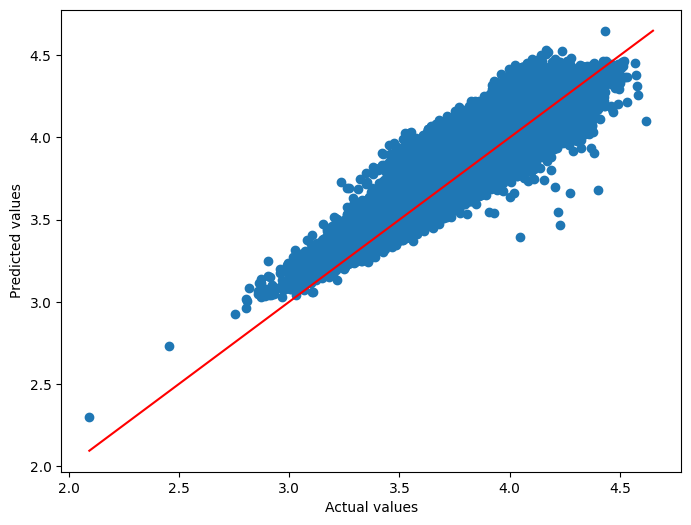

In [54]:
# showing the optimal fitted line
plt.figure(figsize=(8,6))
plt.scatter(Y_test,y_pred_test)
p1 = max(max(y_pred_test),max(Y_test))
p2 = min(min(y_pred_test),min(Y_test))
plt.plot([p1,p2],[p1,p2],c='r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

predicted values is linear to actual values

#Elastic Net Regression

Elastic Net regression is a regularization technique that combines both L1 (Lasso) and L2 (Ridge) regularization penalties in the linear regression model. It is particularly useful when dealing with a dataset that has a large number of features, and some of these features are correlated.

In [55]:
# elastic net
elasticnet=ElasticNet(alpha=0.1,l1_ratio=0.5)

In [56]:
# model  fitting
elasticnet.fit(scaled_x_train,Y_train)


ElasticNet(alpha=0.1)

In [57]:
# Elastic score
elasticnet.score(scaled_x_train,Y_train)


0.6394617895673739

In [89]:
# predicting test set
y_pred_en=elasticnet.predict(scaled_x_test)
y_pred_en

array([3.75797313, 3.91255575, 3.84433337, ..., 3.61997043, 3.66880657,
       3.62219263])

In [59]:
MSE=mse(Y_test,y_pred_en)
print('mse:',MSE)

RMSE=rmse(Y_test,y_pred_en)
print('rmse:',RMSE)

r2=r2_score(Y_test,y_pred_en)
print('r2:',r2)

mse: 0.012318562564571395
rmse: 0.11098902001806933
r2: 0.6400942475647211


in this model we can observe that   
1. mse has given the value near about 0.01 that is very close to 0 hence it is performing well.

2. rmse showinng the value about 0.11 it is also close to 0

3. r2 showing the result about 0.640 that is not so close to 1 hence it is performing not so well

#GridSearchCV for Elastic Net Regression

GridSearchCV allows you to search over a specified hyperparameter grid and find the combination that provides the best performance based on cross-validated results.

In [60]:
# hyperparameter  tuining for elastic net
elastic=ElasticNet()
parameters={'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor=GridSearchCV(elastic,parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(scaled_x_train,Y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+02, tolerance: 1.842e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.742e+01, tolerance: 1.842e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.073e+01, tolerance: 1.840e

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [61]:
# predicted values after hyperparameter tuining
y_pred_elastic=elastic_regressor.predict(scaled_x_test)
print('the best fit alpha value is found out to be :' ,elastic_regressor.best_params_)


the best fit alpha value is found out to be : {'alpha': 1e-13, 'l1_ratio': 0.3}


In [62]:
# model performance metrics
MSE=mse(Y_test,y_pred_elastic)
print('mse:',MSE)

RMSE=np.sqrt(MSE)
print('rmse', RMSE)

r2=r2_score(Y_test,y_pred_test)
print('r2:',r2)

mse: 0.0061904935582682685
rmse 0.07867968961725935
r2: 0.8191352091321038


1. we can observe here that here mse ,rmse has value near about 0 and
2. r2 having the score near about 1   

so,Performing a grid search for hyperparameter tuning in Elastic Net regression is well



#XGBoost Model

XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm that belongs to the family of ensemble learning methods. It's particularly popular for structured/tabular data and is known for its high performance and efficiency.   

XGBoost is an implementation of gradient boosting algorithms and can be used for both classification and regression tasks

In [63]:
# declaring independent and dependent variables
target_col='Sales'
input_cols=merged_df.columns.drop(target_col)
input_cols


Index(['Store', 'DayOfWeek', 'Date', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'year', 'month', 'day', 'Week_of_year', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2'],
      dtype='object')

In [64]:
# train test split
X_train,X_test,y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((675470, 11), (168868, 11), (675470,), (168868,))

In [65]:
# standard scaler to normalize the data
scaler=StandardScaler()
scaler_X_train=scaler.fit_transform(X_train)
scaler_X_test=scaler.transform(X_test)
scaler_X_train[0:10]

array([[ 0.85796381, -0.56766205, -0.89823874, -0.03232349, -0.48983027,
         0.01953232,  1.31559964, -0.94318335,  1.69538147,  1.51647427,
        -0.99750707],
       [ 0.2780685 , -0.77630999, -0.89823874, -0.03232349, -0.48983027,
        -0.78675406,  1.31559964,  1.07054741, -0.13789041,  0.43537047,
        -0.99750707],
       [ 0.2780685 ,  0.41004927,  1.11328977, -0.03232349, -0.48983027,
         1.28655377, -0.88453989,  1.07054741, -0.67761591, -0.28536539,
        -0.99750707],
       [ 0.85796381,  1.38102682,  1.11328977, -0.03232349, -0.48983027,
        -1.24748914, -0.88453989,  1.07054741, -0.6609498 ,  0.43537047,
         1.00249916],
       [ 1.43785912, -0.27736522, -0.89823874, -0.03232349, -0.48983027,
        -1.70822421,  1.31559964, -0.94318335, -0.54428705,  0.43537047,
         1.00249916],
       [ 0.85796381,  1.80512534, -0.89823874, -0.03232349,  2.04152347,
        -0.09565145, -0.88453989,  1.07054741, -0.65325775,  1.15610634,
        -0.997

In [66]:
# buildig xgboost regressor model
xgb=XGBRegressor(random_state=42,n_jobs=-1, n_estimators=20, max_depth=4)
xgb.fit(scaler_X_train,y_train)

y_predict_xgb=xgb.predict(scaler_X_test)

In [67]:
# performance of model
r2s_xgb=r2_score(Y_test,y_predict_xgb)
print('r2:',r2s_xgb)

mae_xgb=mae(Y_test,y_predict_xgb)
print('mae:',mae_xgb)

rmse_xgb=math.sqrt(mse(Y_test,y_predict_xgb))
print('rmse:',rmse_xgb)

r2: 0.8814323022994209
mae: 0.05015561992576868
rmse: 0.06370431001936082


1. mae and rmse has value near to 0 and
2. r2 having the value near about 1    

we can say that this model performing well on this dataset

#Decision Tree Model


Decision Trees are a versatile and widely used machine learning algorithm that can be used for both classification and regression tasks.    

 They work by recursively partitioning the data into subsets based on the features, and at each step, they make decisions based on the feature that provides the best split.

In [68]:
# building decision tree regressor model
model =DecisionTreeRegressor()
model.fit(scaler_X_train,y_train)

y_predict_dt=model.predict(scaler_X_test)

In [90]:
# performance of model
r2s_3=r2_score(Y_test,y_predict_dt)
print('r2s:',r2s_3)

mae_3=mae(Y_test,y_predict_dt)
print('mae:',mae_3)

rmse_3=math.sqrt(mse(Y_test,y_predict_dt))
print('rmse',rmse_3)

r2s: 0.9461287276841183
mae: 0.03145226389228097
rmse 0.04294021742121009


we can observe here that the model showing the best performance high r2 score and low rmse and mae value

#Random Forest Regression Model

Random Forest is an ensemble learning method that builds multiple decision trees during training and outputs the average prediction (for regression tasks) of the individual trees.   
It provides better generalization and reduces overfitting compared to a single decision tree.

In [70]:
# building random tree regressor model
random_forest_model=RandomForestRegressor(n_estimators=100)
random_forest_model.fit(scaler_X_train,y_train)

y_predict_rf=random_forest_model.predict(scaler_X_test)


In [71]:
# performance of model
r2s_4=r2_score(Y_test,y_predict_rf)
print('r2:',r2s_4)

mae_4=mae(Y_test,y_predict_rf)
print('mae:',mae_4)

rmse_4=rmse(Y_test,y_predict_rf)
print('rmse:',rmse_4)


r2: 0.9702594494174424
mae: 0.023516705018657717
rmse: 0.031905101080983454


this model also performing well on the dataset

#Hyperparameter tuining for Random forest

Hyperparameter tuning involves finding the best combination of hyperparameter values for a machine learning model to optimize its performance

In [72]:
# hyperparamter tuining
from sklearn.model_selection import GridSearchCV

param_grid={'bootstrap':[True],'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rfr=RandomForestRegressor(random_state=1)
g_search=GridSearchCV(estimator=rfr,param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(scaler_X_train,y_train);

print(g_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}


In [91]:
# model prediction train test
y_pred_RandomForest_tuned_train=g_search.predict(scaler_X_train)
print(y_pred_RandomForest_tuned_train)

[3.62452723 3.72786226 3.86127814 ... 3.67004311 4.11027759 4.17635882]


In [92]:
# model prediction test set
y_pred_RandomForest_tuned_test=g_search.predict(scaler_X_test)
print(y_pred_RandomForest_tuned_test)

[3.7979899  4.04017836 4.06433803 ... 3.4004875  3.5408847  3.57899516]


In [79]:
print("Regresion Model Training Score" , ":" , g_search.score(scaler_X_train, y_train),
      "Model Test Score" ,":" , g_search.score(scaler_X_test, Y_test))

print("Training RMSE", ":", rmse(y_train, y_pred_RandomForest_tuned_train),
      "Testing RMSE", ":", rmse(Y_test, y_pred_RandomForest_tuned_test))

print("Training MAPE", ":", mape(y_train, y_pred_RandomForest_tuned_train),
      "Testing MAPE", ":", mape(Y_test, y_pred_RandomForest_tuned_test))

r2 = r2_score(Y_test, y_pred_RandomForest_tuned_test)
print("R2 :" ,r2)


Regresion Model Training Score : 0.9947552599621055 Model Test Score : 0.968526250732503
Training RMSE : 0.013370159703746113 Testing RMSE : 0.032821608669525194
Training MAPE : 0.2496568657187718 Testing MAPE : 0.6403937806752831
R2 : 0.968526250732503


we can observe that hyperparameter tuining for random forest has also performing well on the dataset  

#Conclusion


By Looking at the evaluation metrices obtained on implementing different sort of regression model  each model performing well having r2 score well that is more than 90% but comparison to all the models we decided to go with the Random Forest Tuned model.  

beacause r2 was very close to 1 and the metrics like mse mae and rmse has very low value that explains well for the performance of the model

The maximum R^2 was seen in tuned Random Forest model with the value 0.97185. It means our best accurate model is able to explain approx/almost 97% of variances in the datasets.  

where all models like decision tree has also high accuracy but incase we have to choose only the optimal model so we have to go through hyperparameter tuining for random forest

Based on our model; Customer, store Type, Promo & CompetitionDistance are the most impactful features which are driving the sales more as compared to other features present in the dataset.